# Тестовое задание

## Подготовка данных

In [62]:
import pandas as pd #Импорт необхожимых библиотек
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [180]:
data = pd.read_csv('Downloads/train - train.csv',sep=',') # Чтение данных из csv файла
data

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


## Задание 1

>Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)? 
>> Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?
>>>Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

 * Подгруппа – Sub-Category
 * Дата – Order_date
 * Сделать вывод на основе полученных результатов.


<div class= 'alert alert-block alert-warning'>
    <b>Какие подгруппы товаров наиболее часто покупают за все время продаж? </b>
</div>    


In [58]:
data['Sub-Category'].value_counts().head(4) 

Sub-Category
Binders        1492
Paper          1338
Furnishings     931
Phones          876
Name: count, dtype: int64

<div class= 'alert alert-block alert-info'>
    <b> Считаем количество упоминаний каждой уникальной строки в подгруппе Sub-Category. Возвращаем 4 самые часто встречающиеся         подгруппы за все время при помощи head(). </b>
</div>    


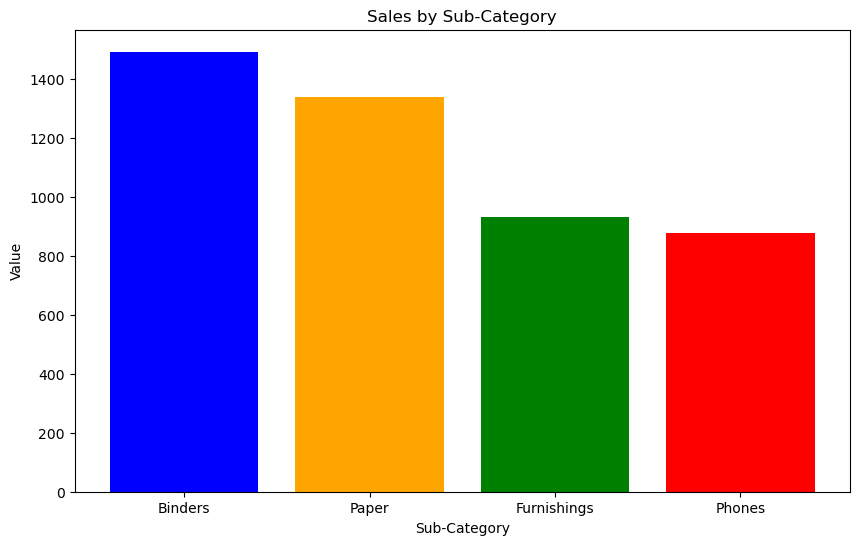

In [177]:
# Строим график по выведенным данных


subcategories = ['Binders', 'Paper', 'Furnishings', 'Phones']
values = [1492, 1338, 931, 876]

plt.figure(figsize=(10, 6))
plt.bar(subcategories, values, color=['blue', 'orange', 'green', 'red'])

plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Value')


plt.show()


<div class= 'alert alert-block alert-warning'>
    <b>Какие подгруппы товаров наиболее часто покупают за последние два года? </b>
</div>    


In [181]:
df_sortbydate = data.sort_index() #Сортировка по дате
df_sortbydate

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [182]:
#Приводим дату к иному формату данных
df_sortbydate['Order Date'] = df_sortbydate['Order Date'].str.replace('/', '-', regex=False)
df_sortbydate['Order Date'] = pd.to_datetime(df_sortbydate['Order Date'])
df_sortbydate


C:\Users\anast\AppData\Local\Temp\ipykernel_6516\3873239187.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_sortbydate['Order Date'] = pd.to_datetime(df_sortbydate['Order Date'])


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,"8639,472"
9796,740,2015-01-04,Стандарт,Урал,Labels,"15246,05"
9797,741,2015-01-04,Стандарт,Урал,Storage,"20415,81"
9798,742,2015-01-04,Стандарт,Урал,Binders,"4559,085"


In [50]:
#Оставляем данные за последние 2 года
df_last2years = df_sortbydate[(df_sortbydate['Order Date'] >= '2017-01-01') & (df_sortbydate['Order Date'] <= '2018-12-31')]
df_last2years

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
5787,8606,2017-01-03,Стандарт,Урал,Phones,"41161,07"
5788,9494,2017-01-03,Стандарт,Урал,Tables,"27777,25"
5789,9495,2017-01-03,Стандарт,Урал,Binders,"7017,037"
5790,4919,2017-01-02,Стандарт,Владивосток,Bookcases,"34832,16"


In [57]:
df_last2years['Sub-Category'].value_counts().head(4)

Sub-Category
Binders        900
Paper          809
Furnishings    557
Phones         510
Name: count, dtype: int64

<div class= 'alert alert-block alert-info'>
    <b> Считаем количество упоминаний за последние 2 года каждой уникальной строки в подгруппе Sub-Category. Возвращаем 4 самые часто встречающиеся подгруппы за все время при помощи head(). </b>
</div>    


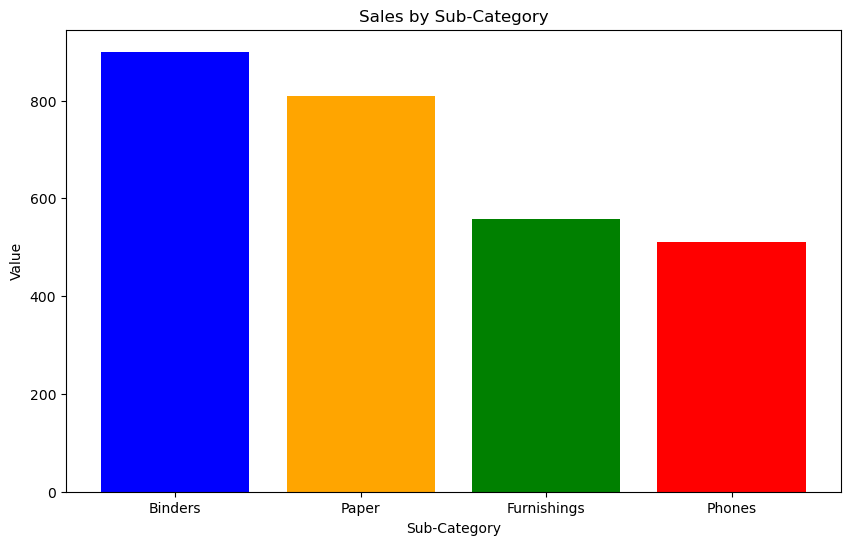

In [176]:
# Строим график по выведенным данных


subcategories = ['Binders', 'Paper', 'Furnishings', 'Phones']
values = [900, 809, 557, 510]

plt.figure(figsize=(10, 6))
plt.bar(subcategories, values, color=['blue', 'orange', 'green', 'red'])

plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Value')


plt.show()


<div class= 'alert alert-block alert-warning'>
    <b>Какие подгруппы товаров наиболее часто покупают за последний год? </b>
</div>    

In [94]:
#Оставляем данные за последний год
df_lastyear = df_sortbydate[(df_sortbydate['Order Date'] >= '2018-01-01') & (df_sortbydate['Order Date'] <= '2018-12-31')]
df_lastyear

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,"37229,08"
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,2018-12-30,Стандарт,Владивосток,Phones,"42133,86"
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612
4,1297,2018-12-30,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
3253,8072,2018-01-01,Стандарт,Урал,Chairs,"36054,37"
3254,8073,2018-01-01,Стандарт,Урал,Art,"1200,78"
3255,8074,2018-01-01,Стандарт,Урал,Binders,"34409,47"
3256,8075,2018-01-01,Стандарт,Урал,Binders,"39805,26"


In [56]:
df_lastyear['Sub-Category'].value_counts().head(4)

Sub-Category
Binders        492
Paper          452
Furnishings    310
Phones         290
Name: count, dtype: int64

<div class= 'alert alert-block alert-info'>
    <b> Считаем количество упоминаний за последний год каждой уникальной строки в подгруппе Sub-Category. Возвращаем 4 самые часто встречающиеся подгруппы за все время при помощи head().</b>
</div>    

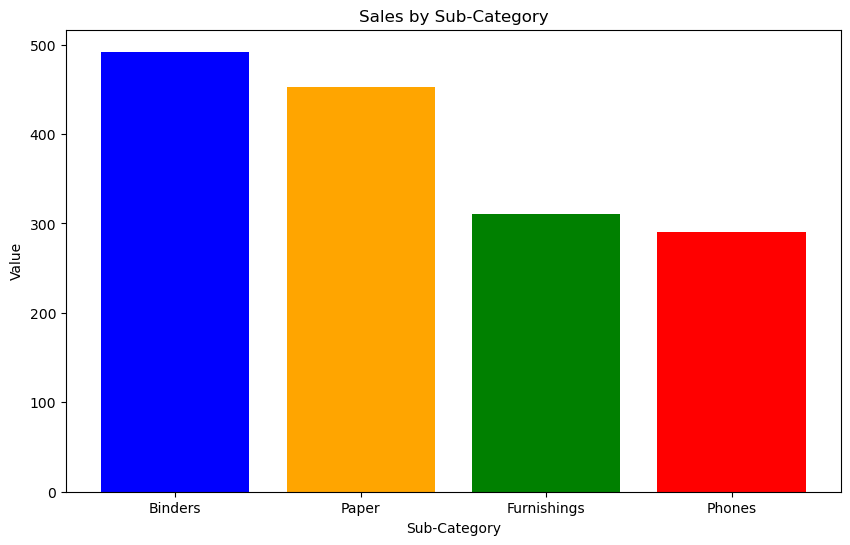

In [175]:
# Строим график по выведенным данных


subcategories = ['Binders', 'Paper', 'Furnishings', 'Phones']
values = [492, 452, 310, 290]

plt.figure(figsize=(10, 6))
plt.bar(subcategories, values, color=['blue', 'orange', 'green', 'red'])

plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Value')


plt.show()


### Вывод по заданию 1

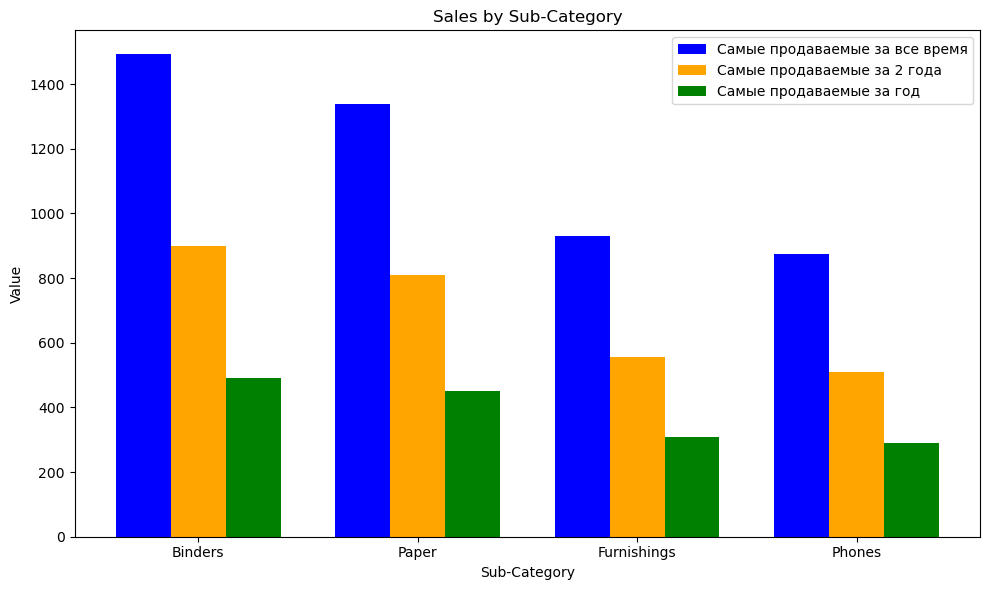

In [178]:
#Построим график для всех 3х запросов

subcategories = ['Binders', 'Paper', 'Furnishings', 'Phones']
values1 = [1492, 1338, 931, 876]
values2 = [900, 809, 557, 510]
values3 = [492, 452, 310, 290]


x = np.arange(len(subcategories))  
width = 0.25  


plt.figure(figsize=(10, 6))


plt.bar(x - width, values1, width, label='Самые продаваемые за все время', color='blue')
plt.bar(x, values2, width, label='Самые продаваемые за 2 года', color='orange')
plt.bar(x + width, values3, width, label='Самые продаваемые за год', color='green')


plt.title('Sales by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Value')
plt.xticks(x, subcategories) 
plt.legend()  


plt.tight_layout()
plt.show()


> Исходя из анализа данных видим:
> - Самые продаваемые категории за все время, последние 2 года и год не изменились
> - Папки занимают лидирующее место в продажах в любой исследованный период времени
> - Продажи папок имеют самый маленький прирост продаж по сравнению с остальными категориями - 9%, когда прирост продаж бумаги - 16%, мебели - 11%, телефонов - 14%
> - Продажи за последние 2 года составляют большую часть всех продаж ( папки, бумага и мебель по 60%, телефоны - 58%)
> - Так как за последние 2 года выросли показатели продаж во всех категориях, можно предположить, что улучшилась маркетинговая стратегия, качество продуктов и узнаваемость бренда на рынке


## Задание 2


- Построить boxplot («Ящик с усами») на основе продаж (Sales). 
- Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 
 >Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


In [183]:
# Приводим данные к типу float 
data['Sales'] = data['Sales'].str.replace(',', '.', regex=False)
data['Sales'] = data['Sales'].astype(float) 
data

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


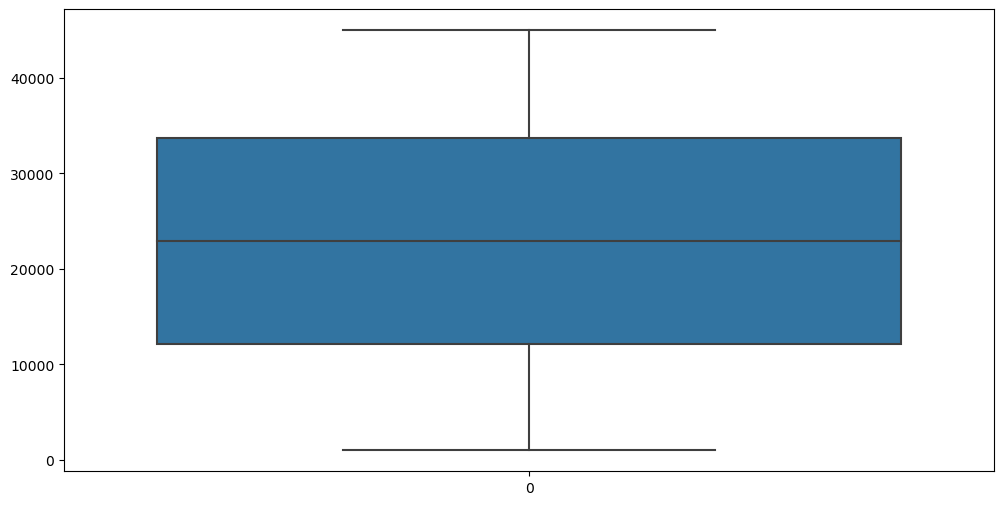

In [189]:
# Используем "Ящики с усами" для анализа данных на наличие выбросов

fig = plt.figure(figsize=(12, 6))

sns.boxplot(data['Sales'])


plt.show()

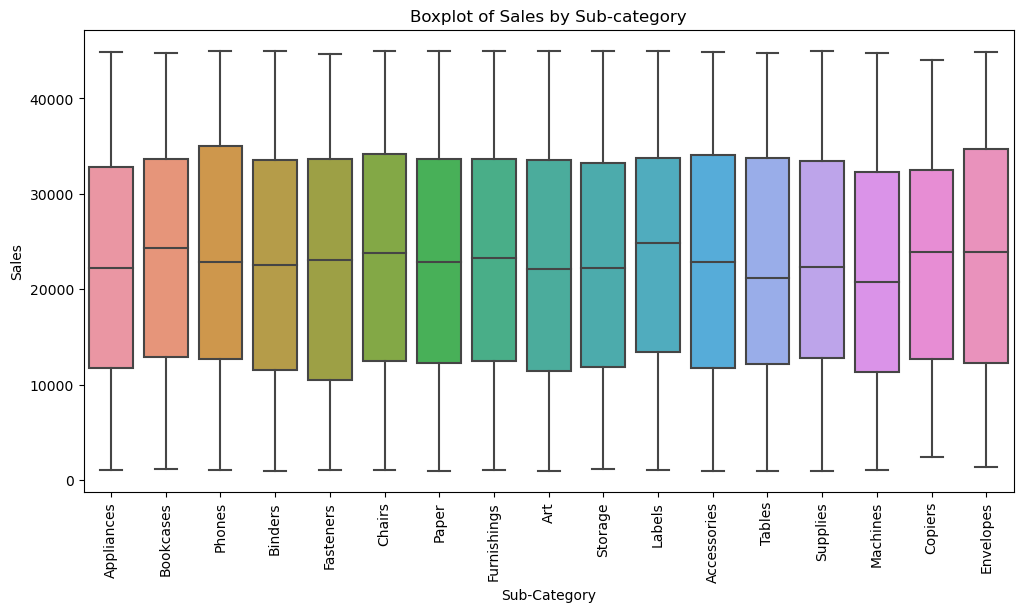

In [199]:
# Проанализируем выбросы в каждой категории товаров
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=data)
plt.title('Boxplot of Sales by Sub-category')
plt.xticks(rotation=90)
plt.show()

In [201]:
#Исходя из ящиков с усами выбросы не наблюдаем, однако сделаем проверочное удаление выбросов
data_new = data.dropna(axis=0)
data_new

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085


Видим, что количество строк осталось таким же - выбросов нет

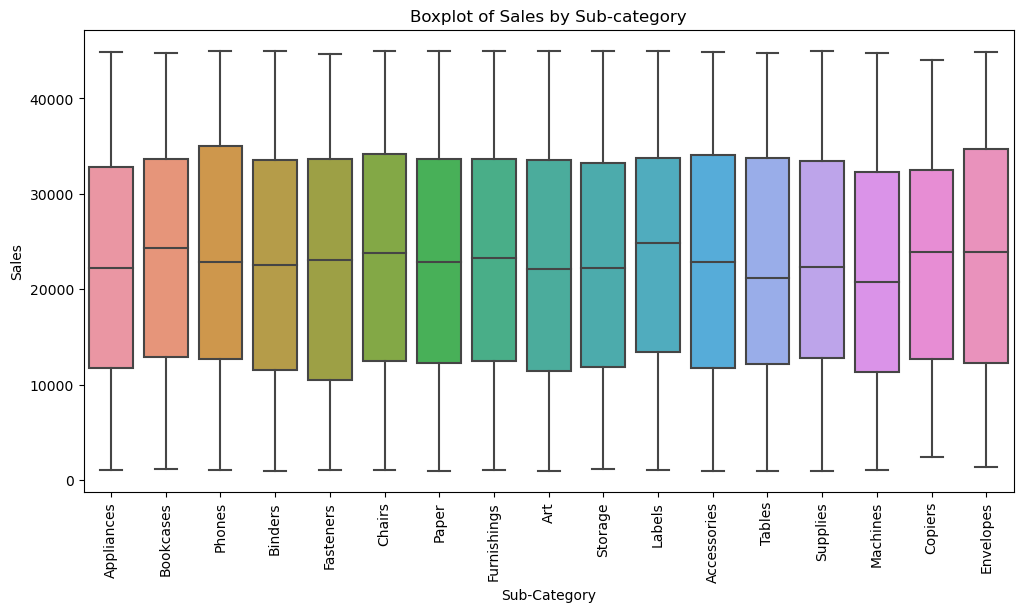

In [203]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=data_new)
plt.title('Boxplot of Sales by Sub-category')
plt.xticks(rotation=90)
plt.show()

In [208]:
mean_sales = data_new['Sales'].mean()
std_sales = data_new['Sales'].std()

print(f"Среднее значение продаж: {mean_sales.round(3)}")
print(f"Стандартное отклонение продаж: {round(std_sales,4)}")

Среднее значение продаж: 22921.758
Стандартное отклонение продаж: 12601.9998


In [210]:
#Среднее значение и отклонение по категориям
def calculate_mean_std(data_new):
    result = data_new.groupby('Sub-Category')['Sales'].agg(['mean', 'std']).reset_index()
    return result

# Вызов функции и вывод результата
mean_std_result = calculate_mean_std(data_new)
print(mean_std_result)

   Sub-Category          mean           std
0   Accessories  22850.459716  12750.349489
1    Appliances  22579.911765  12663.538443
2           Art  22716.513772  12585.959000
3       Binders  22729.205293  12648.437302
4     Bookcases  23686.751155  11970.653117
5        Chairs  23271.306198  12319.924047
6       Copiers  23374.989621  12674.199281
7     Envelopes  23409.891379  12642.667645
8     Fasteners  22146.975341  13343.590286
9   Furnishings  23163.336149  12406.285415
10       Labels  23721.531557  12526.018921
11     Machines  22061.570061  12456.676865
12        Paper  22937.793924  12587.128366
13       Phones  23222.906346  12693.116145
14      Storage  22707.697303  12758.414223
15     Supplies  22800.558815  12260.274383
16       Tables  22261.283303  12859.042512


In [92]:
#Используем правило 3х сигм
low_lim = mean_sales - 3 * std_sales
up_lim = mean_sales + 3 * std_sales

# Фильтрация данных
filt_data = data[(data['Sales'] >= lower_limit) & (data['Sales'] <= upper_limit)]

print(f"Количество оставшихся записей после фильтрации: {filtered_data.shape[0]}")

Количество оставшихся записей после фильтрации: 9800


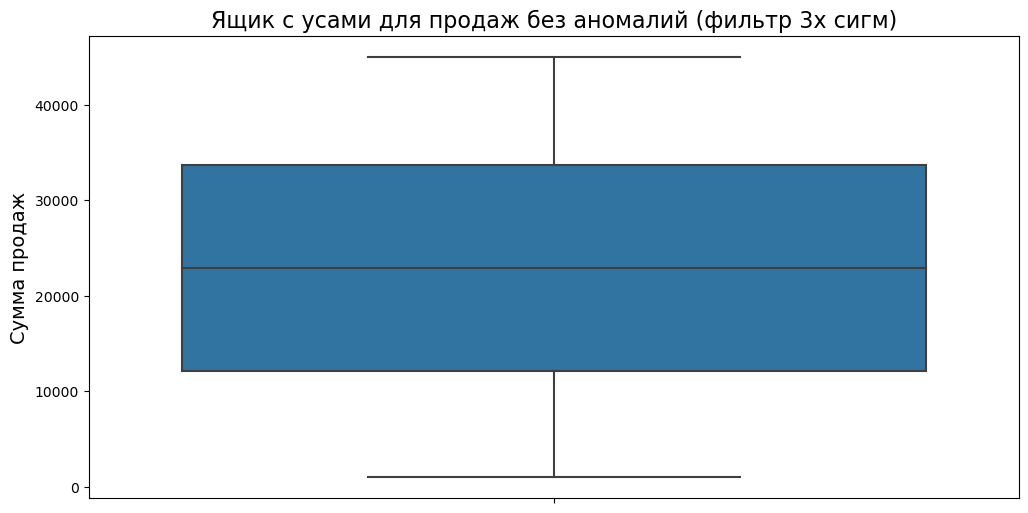

In [217]:
plt.figure(figsize=(12, 6))

# Строим ящик с усами для отфильтрованных данных
sns.boxplot(y='Sales', data=filtered_data)

plt.title('Ящик с усами для продаж без аномалий (фильтр 3х сигм)', fontsize=16)
plt.ylabel('Сумма продаж', fontsize=14)

# Показать график
plt.show()


In [219]:
#Фильтр 3х сигм с учетом категории
def filter_by_sigma(data_new):
    filtered_data = pd.DataFrame()

    for sub_cat in data['Sub-Category'].unique():
        sub_cat_data = data[data['Sub-Category'] == sub_cat]
        mean_sales = sub_cat_data['Sales'].mean()
        std_sales = sub_cat_data['Sales'].std()

        # Рассчитываем границы
        lower_limit = mean_sales - 3 * std_sales
        upper_limit = mean_sales + 3 * std_sales

        # Фильтруем данные по границам
        filt_sub_cat_data = sub_cat_data[(sub_cat_data['Sales'] >= lower_limit) & (sub_cat_data['Sales'] <= upper_limit)]
        
        filtered_data = pd.concat([filtered_data, filt_sub_cat_data], ignore_index=True)

    return filtered_data

# Применение фильтрации по правилу 3х сигм
filtered_data = filter_by_sigma(data_new)

print(f"Количество оставшихся записей после фильтрации по 3х сигм: {filtered_data.shape[0]}")
filtered_data

Количество оставшихся записей после фильтрации по 3х сигм: 9800


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080
1,405,24/12/2018,Стандарт,Владивосток,Appliances,4951.841
2,3546,23/12/2018,Второй класс,Урал,Appliances,5808.618
3,145,22/12/2018,Стандарт,Урал,Appliances,41783.610
4,8954,22/12/2018,Стандарт,Москва,Appliances,31964.390
...,...,...,...,...,...,...
9795,6058,02/03/2015,Стандарт,Владивосток,Envelopes,23233.960
9796,1126,20/01/2015,Стандарт,Москва,Envelopes,37411.620
9797,5465,19/01/2015,Первый класс,Калиниград,Envelopes,6534.445
9798,764,13/01/2015,Второй класс,Москва,Envelopes,3368.102


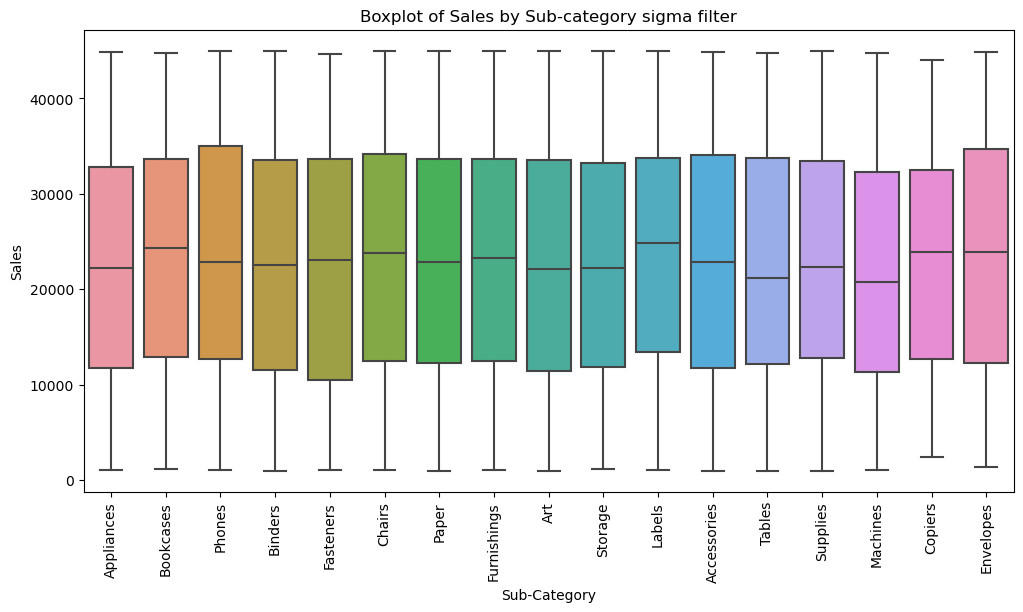

In [220]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=filtered_data)
plt.title('Boxplot of Sales by Sub-category sigma filter')
plt.xticks(rotation=90)
plt.show()

In [228]:
#Применим фильтр интерквартильного размаха
Q1 = data['Sales'].quantile(0.25)
Q3 = data['Sales'].quantile(0.75)
IQR = Q3 - Q1

low_q = Q1 - 1.5 * IQR
up_q = Q3 + 1.5 * IQR

filtered_data_iqr = data[(data['Sales'] >= low_q) & (data['Sales'] <= up_q)]
  


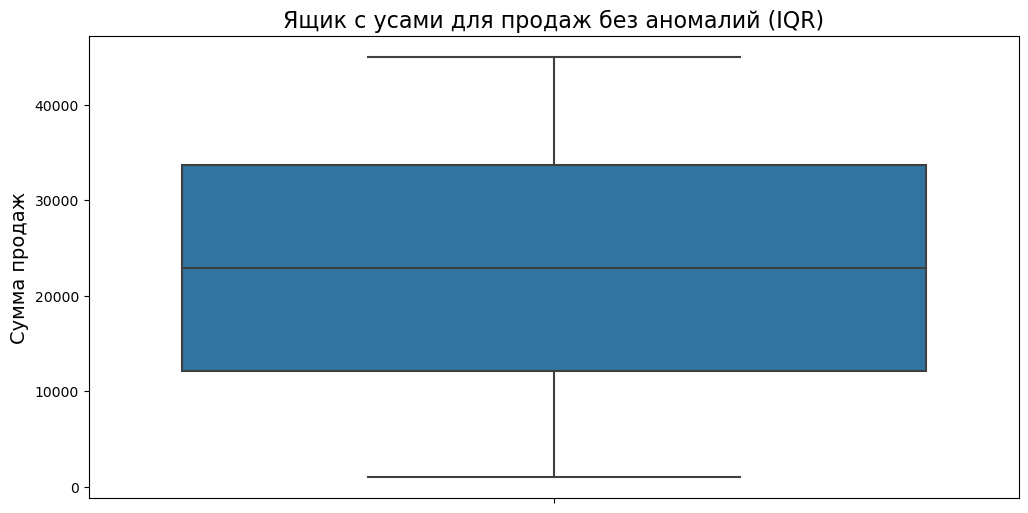

In [229]:
plt.figure(figsize=(12, 6))

# Строим ящик с усами для отфильтрованных данных
sns.boxplot(y='Sales', data=filtered_data_iqr)

plt.title('Ящик с усами для продаж без аномалий (IQR)', fontsize=16)
plt.ylabel('Сумма продаж', fontsize=14)

# Показать график
plt.show()


In [226]:
# IQR фильтр с учетом категории
def filter_by_iqr(data):
    filtered_data_iqr = pd.DataFrame()

    for sub_cat in data['Sub-Category'].unique():
        sub_cat_data = data[data['Sub-Category'] == sub_cat]
        
        Q1 = sub_cat_data['Sales'].quantile(0.25)
        Q3 = sub_cat_data['Sales'].quantile(0.75)
        IQR = Q3 - Q1

        low_q = Q1 - 1.5 * IQR
        up_q = Q3 + 1.5 * IQR

        # Фильтруем данные по границам IQR
        filt_sub_cat_iqr_data = sub_cat_data[(sub_cat_data['Sales'] >= low_q) & (sub_cat_data['Sales'] <= up_q)]
        
        filtered_data_iqr = pd.concat([filtered_data_iqr, filt_sub_cat_iqr_data], ignore_index=True)

    return filtered_data_iqr

# Применение фильтрации по IQR
filtered_data_iqr = filter_by_iqr(data)

print(f"Количество оставшихся записей после фильтрации по IQR: {filtered_data_iqr.shape[0]}")


Количество оставшихся записей после фильтрации по IQR: 9800


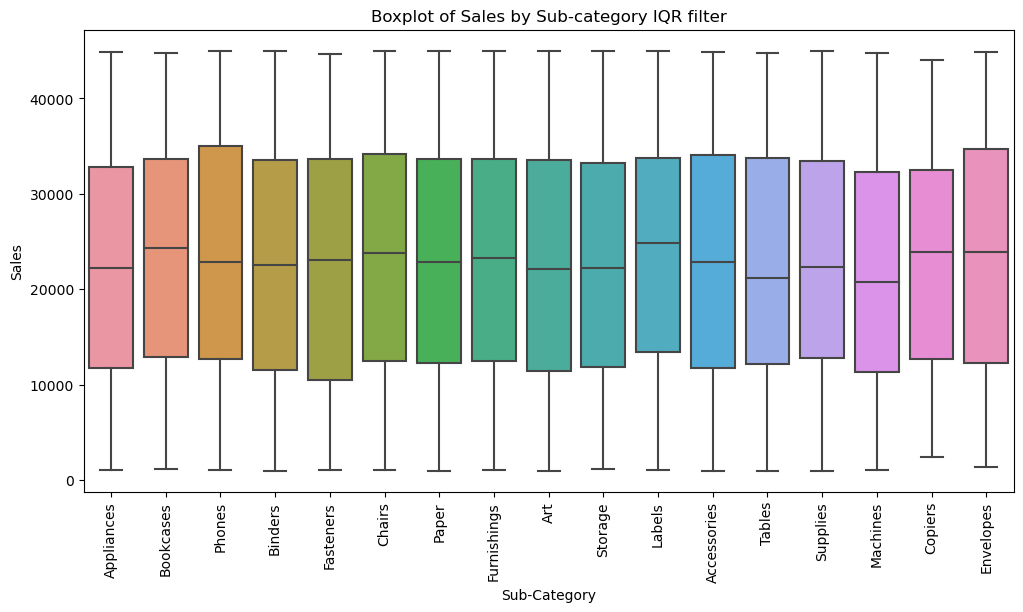

In [227]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Sub-Category', y='Sales', data=filtered_data_iqr)
plt.title('Boxplot of Sales by Sub-category IQR filter')
plt.xticks(rotation=90)
plt.show()

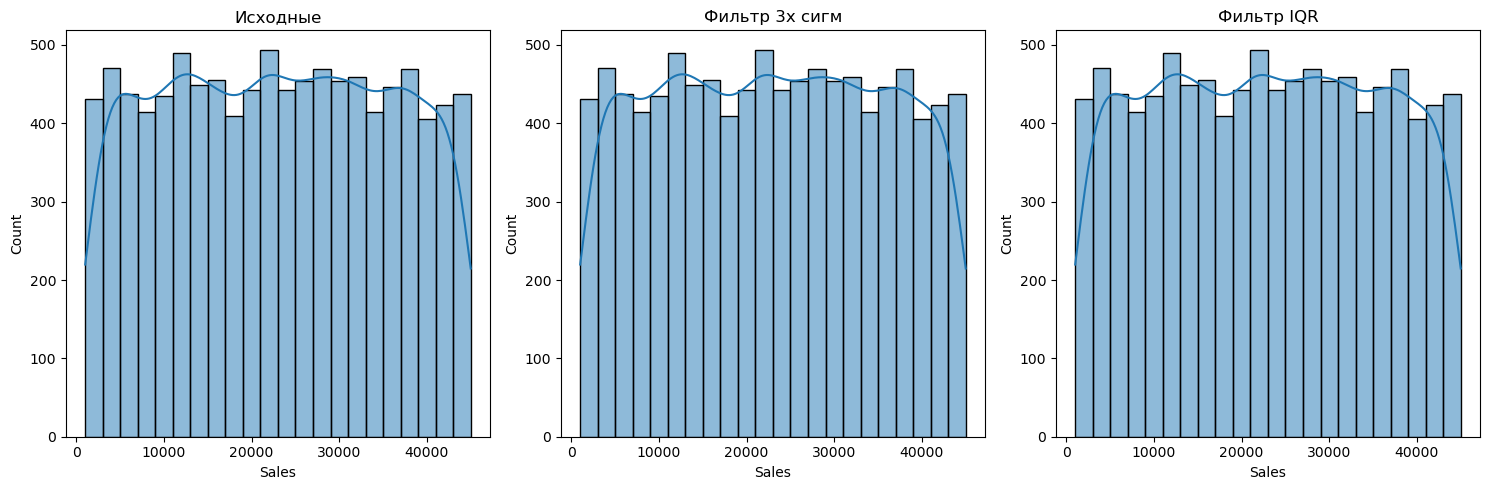

In [230]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  

# Создаем графики для каждого из подграфиков
sns.histplot(x='Sales', kde=True, data=data, ax=axes[0])
axes[0].set_title('Исходные')

sns.histplot(x='Sales', kde=True, data=filtered_data, ax=axes[1])
axes[1].set_title('Фильтр 3х сигм')

sns.histplot(x='Sales', kde=True, data=filtered_data_iqr, ax=axes[2])
axes[2].set_title('Фильтр IQR')

# Корректируем отображение графиков
plt.tight_layout()
plt.show()



In [231]:
a = data['Sales'].min(),data['Sales'].max()
b= filtered_data['Sales'].min(),filtered_data['Sales'].max()
c= filtered_data_iqr['Sales'].min(),filtered_data_iqr['Sales'].max()
print(a,b,c)

(1002.794, 44995.41) (1002.794, 44995.41) (1002.794, 44995.41)


### Вывод по заданию 2

 > - Выбросов данных после анализа продаж не наблюдается
 > - Фильтры ведут себя одинаково как для всех продаж, так и для продаж отдельно по категориям
 > - Распределение продаж равномерно, данные репрезентативны, можно говорить о том, что сбор данных проводился корректно
 > - Следует учесть, что анализ может не ограничиваться данными фильтрами и, возможно, другие методы фильтрации выявят мелкие выбросы, которые не видны после использования данных двух фильтров. Например, стоит попробовать метод опорных векторов (SVM)

##  Задание 3

> Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales
- Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). 
- Определить основные тенденции и паттерны. 
- Выделить наиболее «прибыльную» группу.


In [235]:
quantiles = data['Sales'].quantile([0, 0.33, 0.67, 1]).values

def category_sales(sale):
    if sale <= quantiles[1]:
        return 'Маленькие продажи'
    elif sale <= quantiles[2]:
        return 'Средние продажи'
    else:
        return 'Высокие продажи'

# Применяем функцию к столбцу Sales
data['Sale_group'] = data['Sales'].apply(category_sales)
data

,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,30/12/2018,Стандарт,Урал,Appliances,37229.080,Высокие продажи
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,20994.610,Средние продажи
2,908,30/12/2018,Стандарт,Владивосток,Phones,42133.860,Высокие продажи
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612.000,Маленькие продажи
4,1297,30/12/2018,Стандарт,Калиниград,Binders,28781.130,Средние продажи
...,...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,8639.472,Маленькие продажи
9796,740,04/01/2015,Стандарт,Урал,Labels,15246.050,Маленькие продажи
9797,741,04/01/2015,Стандарт,Урал,Storage,20415.810,Средние продажи
9798,742,04/01/2015,Стандарт,Урал,Binders,4559.085,Маленькие продажи


In [253]:
grouped_data = data.groupby(['Region', 'Sale_group']).agg(
    total_sales=('Sales', 'sum'),
    count=('Sales', 'count'),
    average_sales=('Sales', 'mean')
).reset_index()


grouped_data['total_sales'] = grouped_data['total_sales'].apply(lambda x: f"{x:,.0f}") 
# Приводим столбец к нормальному виду, чтобы не было экспонент, вводим разделитель для тысяч

print(grouped_data)

         Region         Sale_group total_sales  count  average_sales
0   Владивосток    Высокие продажи  35,631,171    950   37506.495853
1   Владивосток  Маленькие продажи   7,643,758    933    8192.666490
2   Владивосток    Средние продажи  20,677,758    902   22924.343670
3    Калиниград    Высокие продажи  37,602,549    999   37640.189019
4    Калиниград  Маленькие продажи   8,702,214   1027    8473.431084
5    Калиниград    Средние продажи  25,625,537   1114   23003.175197
6        Москва    Высокие продажи  20,137,496    536   37569.955616
7        Москва  Маленькие продажи   4,225,440    516    8188.838050
8        Москва    Средние продажи  12,528,715    546   22946.364231
9          Урал    Высокие продажи  27,986,549    749   37365.219319
10         Урал  Маленькие продажи   6,294,823    758    8304.515470
11         Урал    Средние продажи  17,577,216    770   22827.552857


C:\Users\anast\AppData\Local\Temp\ipykernel_6516\2373823647.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_sales', y='Region', hue='Sale_group', data=grouped_data, ci=None)


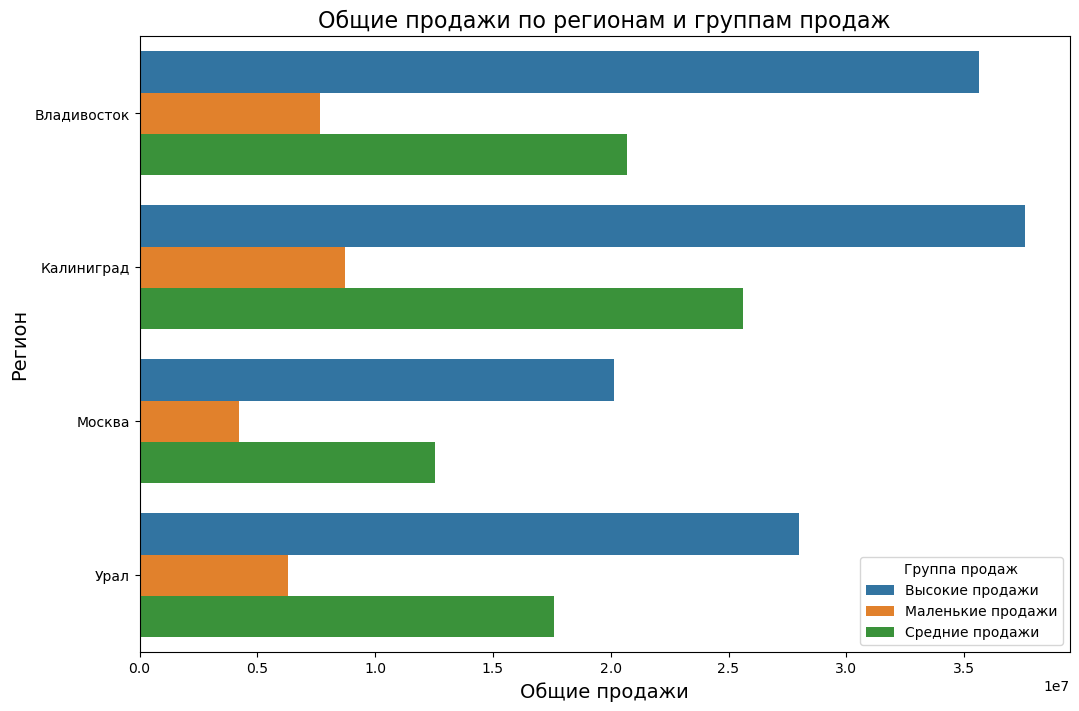

In [252]:
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='Region', hue='Sale_group', data=grouped_data, ci=None)
plt.title('Общие продажи по регионам и группам продаж', fontsize=16)
plt.xlabel('Общие продажи', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.legend(title='Группа продаж')
plt.show()


In [265]:
#Построим таблицу всех продаж по регионам
total_sales_by_region = data.groupby('Region').agg(
    total_sales=('Sales', 'sum')
).reset_index()


total_sales_by_region['Sale_group'] = 'Total_sales_region'



# Приводим столбец к нормальному виду, чтобы не было экспонент
total_sales_by_region['total_sales'] = total_sales_by_region['total_sales'].apply(lambda x: f"{x:,.0f}")
total_sales_by_region

,Region,total_sales,Sale_group
0,Владивосток,"63,952,687",Total_sales_region
1,Калиниград,"71,930,300",Total_sales_region
2,Москва,"36,891,652",Total_sales_region
3,Урал,"51,858,588",Total_sales_region


C:\Users\anast\AppData\Local\Temp\ipykernel_6516\3694602226.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='total_sales', y='Region', hue='Sale_group', data=total_sales_by_region, ci=None)


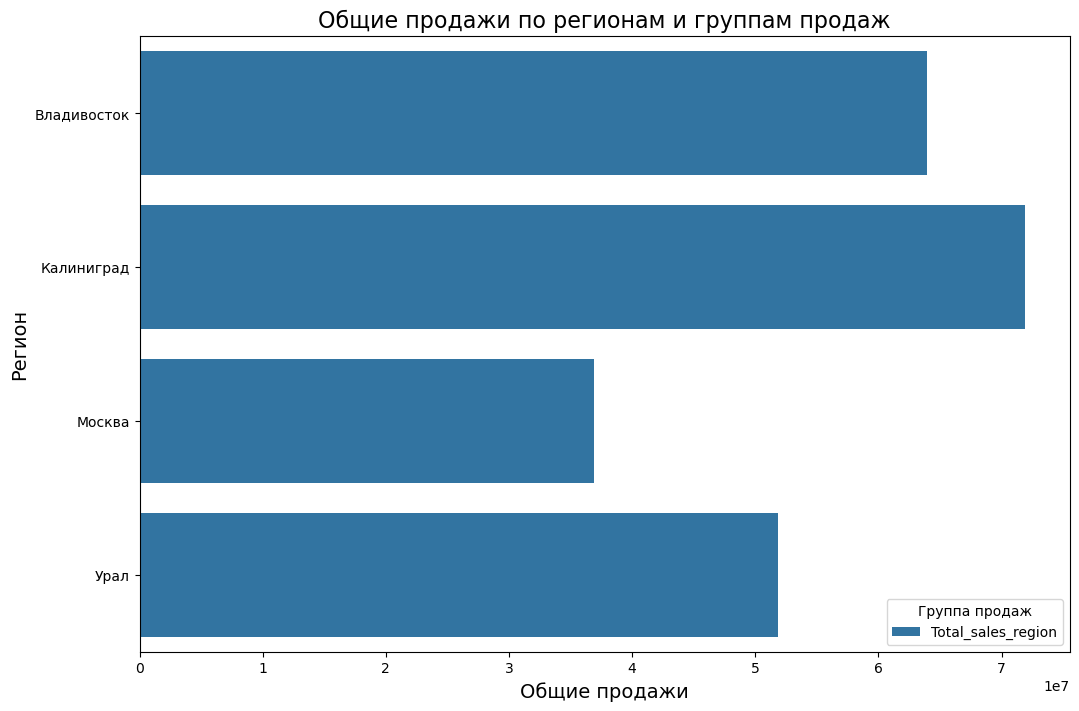

In [264]:
# Строим график
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sales', y='Region', hue='Sale_group', data=total_sales_by_region, ci=None)

plt.title('Общие продажи по регионам и группам продаж', fontsize=16)
plt.xlabel('Общие продажи', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.legend(title='Группа продаж')
plt.show()

C:\Users\anast\AppData\Local\Temp\ipykernel_6516\4281572521.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='average_sales', y='Region', hue='Sale_group', data=grouped_data, ci=None)


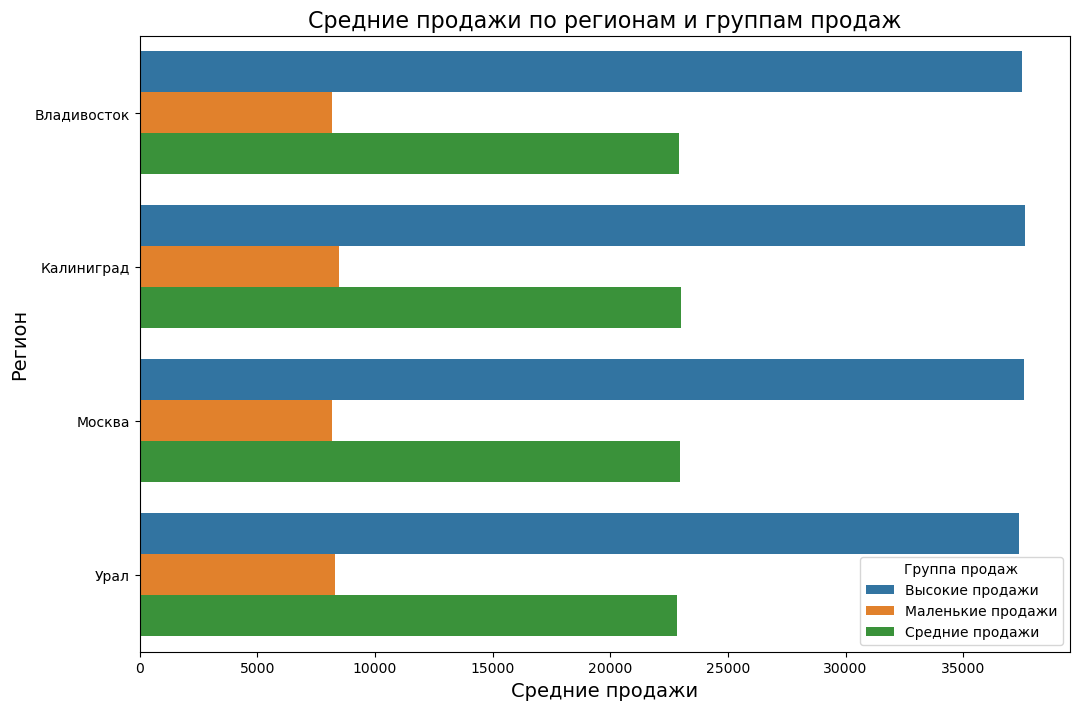

In [268]:
plt.figure(figsize=(12, 8))
sns.barplot(x='average_sales', y='Region', hue='Sale_group', data=grouped_data, ci=None)
plt.title('Средние продажи по регионам и группам продаж', fontsize=16)
plt.xlabel('Средние продажи', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.legend(title='Группа продаж')
plt.show()


C:\Users\anast\AppData\Local\Temp\ipykernel_6516\1911259117.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='count', y='Region', hue='Sale_group', data=grouped_data, ci=None)


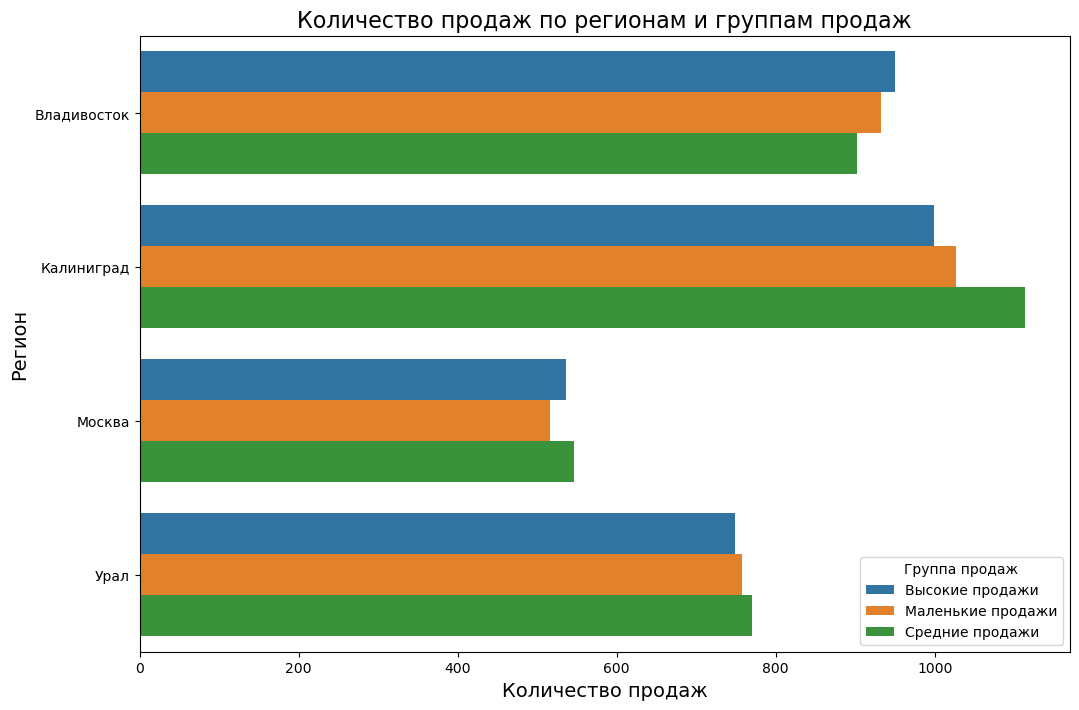

In [269]:
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='Region', hue='Sale_group', data=grouped_data, ci=None)
plt.title('Количество продаж по регионам и группам продаж', fontsize=16)
plt.xlabel('Количество продаж', fontsize=14)
plt.ylabel('Регион', fontsize=14)
plt.legend(title='Группа продаж')
plt.show()

### Вывод по заданию 3

>- Самое большая сумма продаж наблюдается в Калининграде - 71,930,300р . Он также лидирует по сумме продаж во всех категориях (маленькие - 8,702,214, средние -  20,677,758 и высокие - 37,602,549).
>- Самая маленькая сумма продаж наблюдается в Москве -  36,891,652. По сумме продаж во всех категориях также занимает последнее место (маленькие - 4,225,440, средние -  12,528,715 и высокие - 20,137,496).
>- Сумма продаж во Владивостоке - 63,952,687, по категориям: маленькие - 7,643,758, средние -  20,677,758 и высокие - 35,631,171
>- Сумма продаж на Урале - 51,858,588, по категориям: маленькие - 6,294,823, средние -  17,577,216 и высокие - 27,986,549
>- Также в Калининграде самое большое количество продаж - 2140 (высокие - 999, средние - 1114, маленькие - 1027)
>- По среднему показателю продаж регионы практически равны, можно пренебречь допустимой погрешностью. М 
>- Во Владивостоке и Москве по количеству продаж лидирует категория высоких продаж, в Калининграде и на Урале - средних. На урале также количество продаж во всех категориях примерно одинаковое (749 -высокие, 758 - маленькие, 770 - средние)

